In [162]:
import tensorflow
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv1D, MaxPooling1D,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split
import numpy

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler


import tensorflow as tf
print(tf.__version__)

import numpy as np
print(np.__version__)

numpy.random.seed(2)
import pandas as pd

2.8.0
1.20.3


In [163]:
dataset_e1= pd.read_csv(r"C:\Users\MSI_GAMER\Documents\deep\AI-challenge\stand_norm_e1.txt",delimiter=" ",header=None)
dataset_e1=numpy.array(dataset_e1,float)

X_e1 = dataset_e1[:,:8]

print(X_e1.shape)

(13762, 8)


In [164]:
dataset_e2= pd.read_csv(r"C:\Users\MSI_GAMER\Documents\deep\AI-challenge\stand_norm_e2.txt",delimiter=" ",header=None)
dataset_e2=numpy.array(dataset_e2,float)

X_e2 = dataset_e2[:,:8]

n=np.max(X_e2)
X_e2=X_e2/n
print(X_e2.shape)

(13762, 8)


In [165]:
x_train_test=np.zeros((X_e1.shape[0],X_e1.shape[1],2))
x_train_test[:,:,0]=X_e1
x_train_test[:,:,1]=X_e2
print(x_train_test.shape)


(13762, 8, 2)


In [166]:
dataset_output= pd.read_csv(r"C:\Users\MSI_GAMER\Documents\deep\AI-challenge\y2_e1.txt",delimiter=" ",header=None)
dataset_output=numpy.array(dataset_output,float)
dataset_output_new= dataset_output.reshape(dataset_output.shape[0], )

In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_test, dataset_output_new, test_size=0.15, random_state=42)

In [168]:
x_train_new=x_train
x_test_new=x_test

In [169]:
print(x_train_new.shape)
print(y_train.shape)

Y_train_new = tensorflow.keras.utils.to_categorical( y_train)
Y_test_new = tensorflow.keras.utils.to_categorical(y_test)
print(Y_train_new.shape)

(11697, 8, 2)
(11697,)
(11697, 3)


print (x_train_new.shape)
x_train_new=x_train_new.reshape(x_train_new.shape[0],  x_train_new.shape[1], 2)
x_test_new = x_test_new.reshape(x_test_new.shape[0], x_test_new.shape[1],2 )
print (x_train_new.shape)

data_augmentation


In [170]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3,
                 activation='relu',data_format="channels_last",padding='same',
                 input_shape=(8,2)))
model.add(BatchNormalization())
model.add(Conv1D(128, 3, activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3,strides=None))
model.add(Dropout(0.1))
model.add(Conv1D(512, 3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2,strides=None))
model.add(Dropout(0.1))
model.add(Flatten()) # Flatten is the input layer of the Fully Connected
model.add(Dense(100, activation='relu')) # gets input size from flatten
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


In [173]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [174]:
checkpointer = ModelCheckpoint(filepath='./'+'_best_weights.h5', verbose=2, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased

history =model.fit(x_train_new, Y_train_new, epochs=100, batch_size=512, verbose=2, validation_split=0.2, callbacks=[checkpointer])

model.save('weights_cnn2.h5')

Epoch 1/100

Epoch 1: val_loss improved from inf to 2.22655, saving model to .\_best_weights.h5
19/19 - 2s - loss: 0.6513 - accuracy: 0.6694 - val_loss: 2.2266 - val_accuracy: 0.5231 - 2s/epoch - 99ms/step
Epoch 2/100

Epoch 2: val_loss improved from 2.22655 to 1.27654, saving model to .\_best_weights.h5
19/19 - 1s - loss: 0.6335 - accuracy: 0.6762 - val_loss: 1.2765 - val_accuracy: 0.5449 - 910ms/epoch - 48ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.27654 to 1.00843, saving model to .\_best_weights.h5
19/19 - 1s - loss: 0.6259 - accuracy: 0.6800 - val_loss: 1.0084 - val_accuracy: 0.5756 - 915ms/epoch - 48ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.00843 to 0.84815, saving model to .\_best_weights.h5
19/19 - 1s - loss: 0.6303 - accuracy: 0.6796 - val_loss: 0.8482 - val_accuracy: 0.6115 - 933ms/epoch - 49ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.84815 to 0.68413, saving model to .\_best_weights.h5
19/19 - 1s - loss: 0.6343 - accuracy: 0.6725 - val_loss

Epoch 45/100

Epoch 45: val_loss did not improve from 0.62618
19/19 - 1s - loss: 0.6190 - accuracy: 0.6792 - val_loss: 0.6294 - val_accuracy: 0.6769 - 814ms/epoch - 43ms/step
Epoch 46/100

Epoch 46: val_loss did not improve from 0.62618
19/19 - 1s - loss: 0.6165 - accuracy: 0.6800 - val_loss: 0.6298 - val_accuracy: 0.6761 - 810ms/epoch - 43ms/step
Epoch 47/100

Epoch 47: val_loss did not improve from 0.62618
19/19 - 1s - loss: 0.6166 - accuracy: 0.6795 - val_loss: 0.6413 - val_accuracy: 0.6718 - 845ms/epoch - 44ms/step
Epoch 48/100

Epoch 48: val_loss did not improve from 0.62618
19/19 - 1s - loss: 0.6154 - accuracy: 0.6792 - val_loss: 0.6291 - val_accuracy: 0.6752 - 789ms/epoch - 42ms/step
Epoch 49/100

Epoch 49: val_loss did not improve from 0.62618
19/19 - 1s - loss: 0.6155 - accuracy: 0.6824 - val_loss: 1.0238 - val_accuracy: 0.6380 - 836ms/epoch - 44ms/step
Epoch 50/100

Epoch 50: val_loss did not improve from 0.62618
19/19 - 1s - loss: 0.6235 - accuracy: 0.6675 - val_loss: 0.7104

Epoch 92/100

Epoch 92: val_loss did not improve from 0.62467
19/19 - 1s - loss: 0.6208 - accuracy: 0.6719 - val_loss: 0.6375 - val_accuracy: 0.6530 - 820ms/epoch - 43ms/step
Epoch 93/100

Epoch 93: val_loss did not improve from 0.62467
19/19 - 1s - loss: 0.6250 - accuracy: 0.6730 - val_loss: 0.6386 - val_accuracy: 0.6581 - 838ms/epoch - 44ms/step
Epoch 94/100

Epoch 94: val_loss did not improve from 0.62467
19/19 - 1s - loss: 0.6207 - accuracy: 0.6728 - val_loss: 0.6402 - val_accuracy: 0.6530 - 816ms/epoch - 43ms/step
Epoch 95/100

Epoch 95: val_loss did not improve from 0.62467
19/19 - 1s - loss: 0.6215 - accuracy: 0.6708 - val_loss: 0.6467 - val_accuracy: 0.6410 - 801ms/epoch - 42ms/step
Epoch 96/100

Epoch 96: val_loss did not improve from 0.62467
19/19 - 1s - loss: 0.6234 - accuracy: 0.6744 - val_loss: 0.6373 - val_accuracy: 0.6530 - 792ms/epoch - 42ms/step
Epoch 97/100

Epoch 97: val_loss did not improve from 0.62467
19/19 - 1s - loss: 0.6176 - accuracy: 0.6764 - val_loss: 0.6395

In [181]:
score = model.evaluate(x_test_new, Y_test_new, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

65/65 - 0s - loss: 0.6233 - accuracy: 0.6789 - 289ms/epoch - 4ms/step
Test loss: 0.6233050227165222
Test accuracy: 0.678934633731842


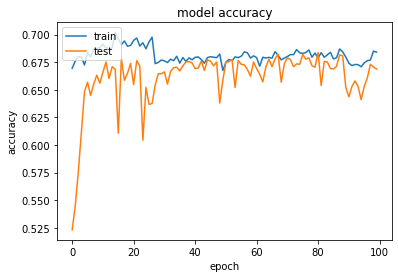

In [182]:
import matplotlib.pyplot as plt # shorcut for a plot function
plt.plot(history.history['accuracy']) # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

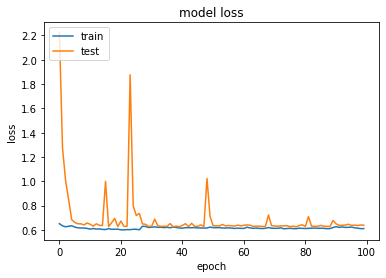

In [177]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [178]:
predictions = model.predict(x_test_new, batch_size=32, verbose=2)
print ("predicted images size :",predictions.shape)
print(predictions)
print(Y_test_new.shape)

65/65 - 0s - 358ms/epoch - 6ms/step
predicted images size : (2065, 3)
[[4.0857640e-01 5.8972228e-01 1.7013188e-03]
 [4.3520463e-01 5.6339079e-01 1.4045548e-03]
 [5.7930797e-01 4.2000389e-01 6.8810495e-04]
 ...
 [6.4200115e-01 3.3945158e-01 1.8547276e-02]
 [3.9629623e-01 6.0362744e-01 7.6331198e-05]
 [8.8128555e-01 1.1862974e-01 8.4631400e-05]]
(2065, 3)


In [179]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((predictions.shape[0]))
y_test = np.empty((predictions.shape[0]))
for i in range(predictions.shape[0]):
    
    y_pred[i]=np.argmax(predictions[i])
    y_test[i]=np.argmax(Y_test_new[i])
#print(y_pred)
    
       
confusion = confusion_matrix(y_test,  y_pred)
print (confusion)


Confusion matrix:  Custom threshold (for positive) of 0.5
[[627 353   0]
 [284 772   0]
 [ 17   9   3]]


In [180]:

print("The accuracy score on this random test-set is  :", accuracy_score(y_test,  y_pred) )
recall=recall_score(y_test,  y_pred, average=None)
av_recall=sum(recall)/3
print("recall",recall, "the avreage recall is ",av_recall)
precision=precision_score(y_test,  y_pred,average=None)
av_precision=sum(precision)/3

print("precision",precision,"the avreage precision is ",av_precision)

F1_score=(2*av_precision*av_recall)/(av_precision+av_recall)
print("F1_score",F1_score)

The accuracy score on this random test-set is  : 0.6789346246973366
recall [0.63979592 0.73106061 0.10344828] the avreage recall is  0.49143493343000727
precision [0.67564655 0.68077601 1.        ] the avreage precision is  0.7854741886111617
F1_score 0.6045997305964422
